In [1]:
# Importing import libraries

In [2]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Stages of Project: 

1. Data Cleaning
2. EDA
3. Feature Engineering
4. Modelling
5. Website
6. Deployment

In [3]:
# Reading the Dataset

In [4]:
df = pd.read_excel('train.xlsx')

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.shape

(10683, 11)

In [7]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
6668,Jet Airways,18/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,12:35 19 May,23h 10m,2 stops,No info,16704
8370,IndiGo,18/04/2019,Banglore,Delhi,BLR → DEL,00:30,03:25,2h 55m,non-stop,No info,4423
9131,Jet Airways,9/06/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,8016
7289,IndiGo,21/03/2019,Delhi,Cochin,DEL → BOM → COK,09:10,15:30,6h 20m,1 stop,No info,9709
3421,IndiGo,1/05/2019,Chennai,Kolkata,MAA → CCU,07:55,10:15,2h 20m,non-stop,No info,3850


In [8]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
# checking whether any null values are present in dataset
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
#droping all null values
df.dropna(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [32]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [33]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [16]:
# Extracting Day and month of the journey.
df['Journey_day'] = pd.to_datetime(df.Date_of_Journey,format ="%d/%m/%Y").dt.day
df['Journey_month']=pd.to_datetime(df.Date_of_Journey,format ="%d/%m/%Y").dt.month

In [17]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
7049,Air India,21/03/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:15,6h 15m,1 stop,No info,7934,21,3
4019,Jet Airways,9/06/2019,Kolkata,Banglore,CCU → BOM → BLR,08:25,16:20,7h 55m,1 stop,No info,14571,9,6
2931,Air India,24/04/2019,Banglore,Delhi,BLR → DEL,17:00,19:45,2h 45m,non-stop,No info,6121,24,4
3687,Air India,15/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8669,15,5
5433,Vistara,15/04/2019,Banglore,Delhi,BLR → DEL,17:00,19:35,2h 35m,non-stop,No info,5613,15,4


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Journey_day      10682 non-null  int64 
 12  Journey_month    10682 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [18]:
#after extracting date and month of jounery Date_of_Journey column is delected
df.drop(['Date_of_Journey'],axis=1,inplace = True)

In [19]:
df.sample(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
5296,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,18:55,16:20 02 Apr,21h 25m,1 stop,In-flight meal not included,7064,1,4
9278,IndiGo,Mumbai,Hyderabad,BOM → HYD,19:05,20:35,1h 30m,non-stop,No info,2754,3,4


In [20]:
df['dep_hour'] = pd.to_datetime(df['Dep_Time'],format ="%H:%M").dt.hour

In [21]:
df['dep_min'] = pd.to_datetime(df['Dep_Time'],format ="%H:%M").dt.minute

In [22]:
df.sample(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min
10342,SpiceJet,Kolkata,Banglore,CCU → BLR,22:20,00:40 13 Jun,2h 20m,non-stop,No info,3873,12,6,22,20
2507,IndiGo,Banglore,Delhi,BLR → DEL,16:55,19:45,2h 50m,non-stop,No info,4823,1,6,16,55


In [25]:
# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [26]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [27]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [28]:
# Adding duration_hours and duration_mins list to df dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [30]:
df.sample(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,Duration_hours,Duration_mins
414,IndiGo,Banglore,Delhi,BLR → DEL,13:00,2h 50m,non-stop,No info,3943,18,5,10,10,2,50
6951,Air India,Delhi,Cochin,DEL → BLR → COK,23:00,13h 30m,1 stop,No info,8907,21,5,9,30,13,30


In [31]:
#dropping Duration column from df since we have extracted duration hour and mins

df.drop(['Duration'],axis = 1, inplace = True)

In [32]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour

In [33]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,Duration_hours,Duration_mins,Arrival_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,2,50,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5,50,7,25,13


In [34]:
df['Arrival_minute'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [35]:
df.sample(2)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,dep_hour,dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_minute
7502,SpiceJet,Banglore,New Delhi,BLR → DEL,23:20,non-stop,No info,6860,3,3,20,30,2,50,23,20
9030,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,01:35 10 Mar,1 stop,In-flight meal not included,14086,9,3,18,15,7,20,1,35


# Handling Categorical Data

1. Nominal data---> data are not in any order--> OneHotEncoder is used in this case
2. ordinal data--> data are in order---> LabelEncoder is used in this case

In [37]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [38]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

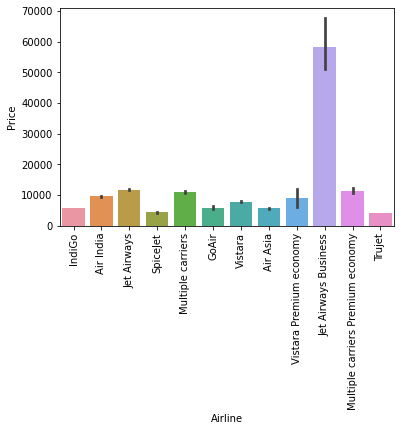

In [39]:
sns.barplot(x = df['Airline'], y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

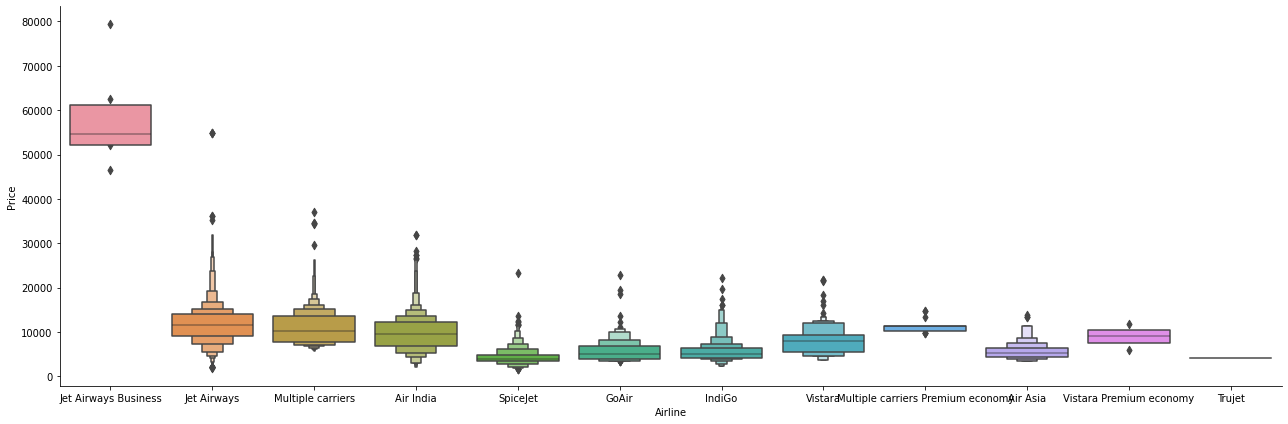

In [40]:
#From graph we can see that jet airways business have the highest price
# and all other airways are almost all are having similar median
sns.catplot(y="Price",x = "Airline", data = df.sort_values("Price", ascending = False),kind ="boxen",height = 6, aspect = 3 )
plt.show()

In [41]:
# Airline is categorical data one hot encoding is done on Airline

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline,drop_first = True) # get dummies one hot encoding techniques

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [42]:
#Source and destination  is categorical data
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [43]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

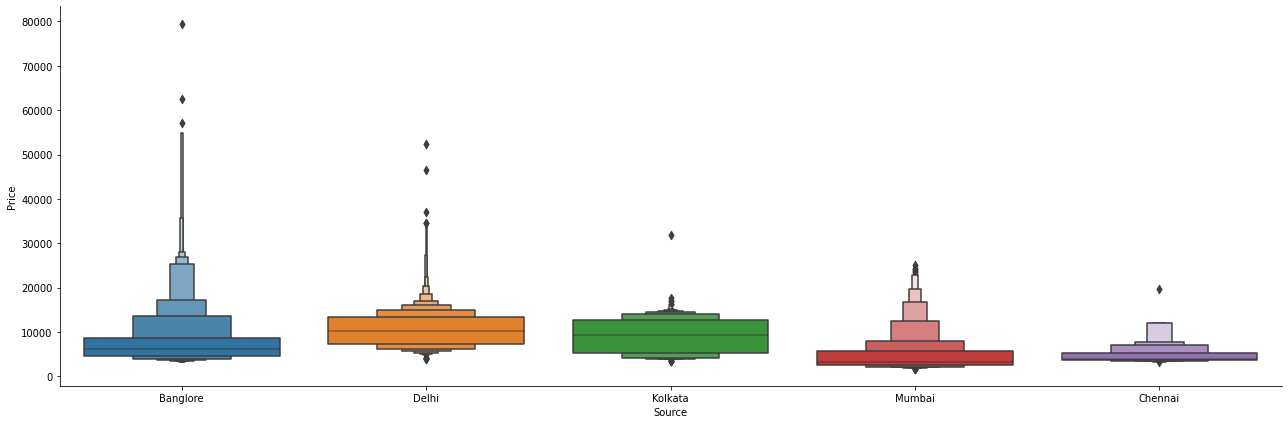

In [110]:
# Source and price relationship
sns.catplot(y="Price",x = "Source", data = df.sort_values("Price", ascending = False),kind ="boxen",height = 6, aspect = 3 )
plt.show()
# Bangalore has more outliers 

In [44]:
#applying one hot encoding and converting Source categorical data numerical values

Source = df[["Source"]]

Source = pd.get_dummies(Source,drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [45]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [46]:
#applying one hot encoding  to Destination and converting categorical data numerical values

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination,drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
# Additional_info does not contain any information 
# Route and Total_stops gives same info we can drop Route

df.drop(["Route","Additional_Info"], axis = 1, inplace = True)

KeyError: "['Route' 'Additional_Info'] not found in axis"

In [49]:
df.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,non-stop,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,13:15,2 stops,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2 stops,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,23:30,1 stop,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,21:35,1 stop,13302,1,3,16,50,4,45,21,35


In [50]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

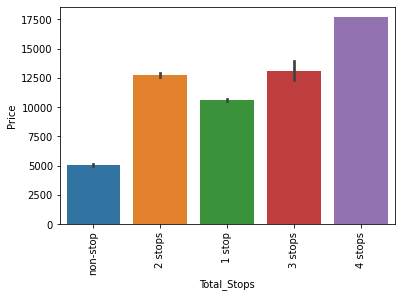

In [51]:
# as the number of stops increases price of flight increases
sns.barplot(x = df['Total_Stops'], y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
# As the number of stops increases the price of flight also increses therefore it is a Ordinal data i,e we will perform Label Encoder
    
    
df.replace({"non-stop": 0, '1 stop': 1,'2 stops':2,'3 stops':3,'4 stops':4},inplace = True)

In [53]:
df.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,Duration_hours,Duration_mins,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,13:15,2,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,23:30,1,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,21:35,1,13302,1,3,16,50,4,45,21,35


In [54]:
data_train = pd.concat([df,Airline,Source,Destination],axis =1)

In [55]:
data_train.drop(["Airline","Source","Destination"],axis = 1, inplace = True)

In [56]:
data_train.head()

,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,dep_hour,dep_min,Duration_hours,Duration_mins,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,01:10 22 Mar,0,3897,24,3,22,20,2,50,1,...,0,0,0,0,0,0,0,0,0,1
1,13:15,2,7662,1,5,5,50,7,25,13,...,0,0,0,1,0,0,0,0,0,0
2,04:25 10 Jun,2,13882,9,6,9,25,19,0,4,...,0,0,1,0,0,1,0,0,0,0
3,23:30,1,6218,12,5,18,5,5,25,23,...,0,0,0,1,0,0,0,0,0,0
4,21:35,1,13302,1,3,16,50,4,45,21,...,0,0,0,0,0,0,0,0,0,1


In [57]:
data_train.drop(['Arrival_Time'],axis=1,inplace=True)

In [58]:
data_train.drop(['Dep_Time'],axis=1,inplace=True)

KeyError: "['Dep_Time'] not found in axis"

In [59]:
data_train.shape

(10682, 30)

TEST SET

In [61]:
test_data=pd.read_excel('Test_set.xlsx')

In [62]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [63]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [64]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**
**feature_importance_**
**SelectKBest**

In [65]:
data_train.shape

(10682, 30)

In [66]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'Duration_hours', 'Duration_mins', 'Arrival_hour',
       'Arrival_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [69]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'dep_hour',
       'dep_min', 'Arrival_hour', 'Arrival_minute', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,dep_hour,dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

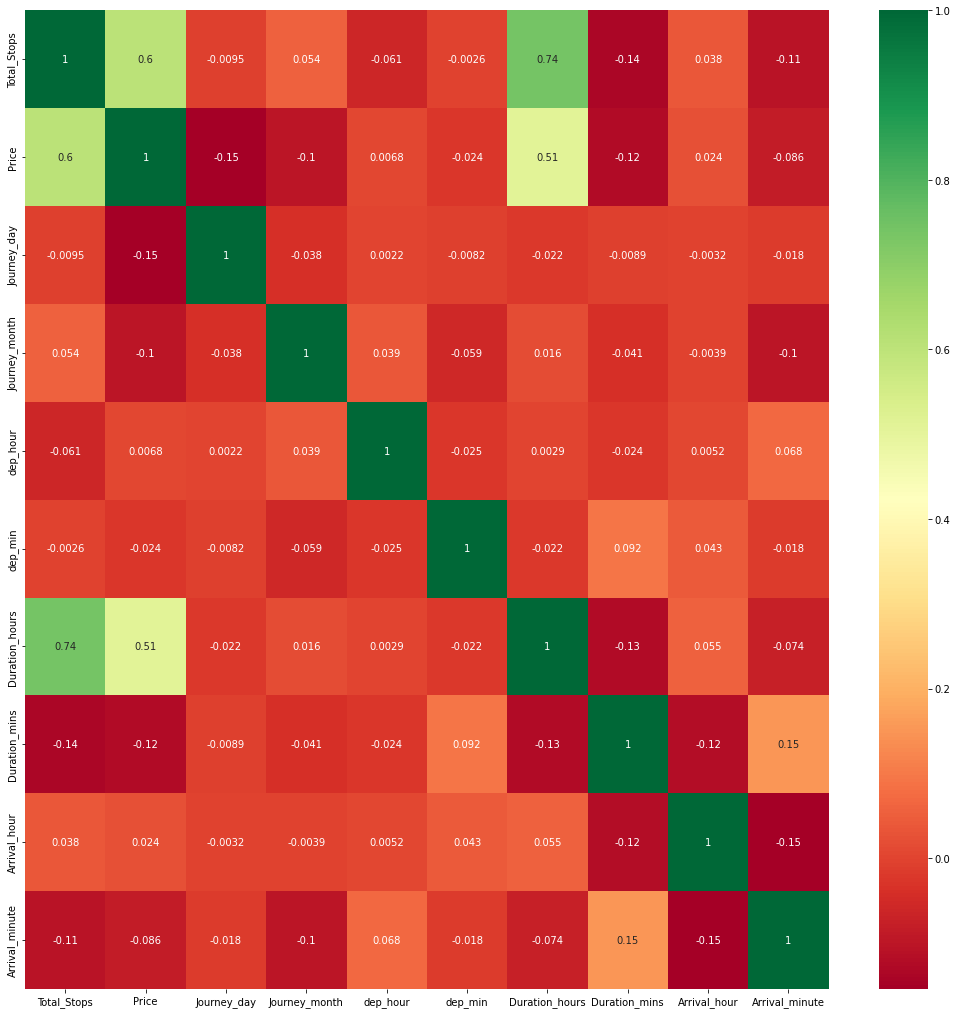

In [72]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [73]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [74]:
print(selection.feature_importances_)

[2.25321977e-01 1.43543122e-01 5.36260290e-02 2.42693577e-02
 2.09644598e-02 2.80249050e-02 1.92065226e-02 1.21271756e-01
 1.82290804e-02 8.71568566e-03 2.30677465e-03 2.01944754e-02
 1.41623388e-01 6.69022645e-02 1.64912090e-02 8.19411824e-04
 3.56776841e-03 8.83809030e-05 4.97218852e-03 8.31404641e-05
 4.07422380e-04 6.82244005e-03 3.23027992e-03 6.40619229e-03
 1.40542341e-02 1.53916404e-02 7.92987513e-03 5.30982599e-04
 2.50050367e-02]


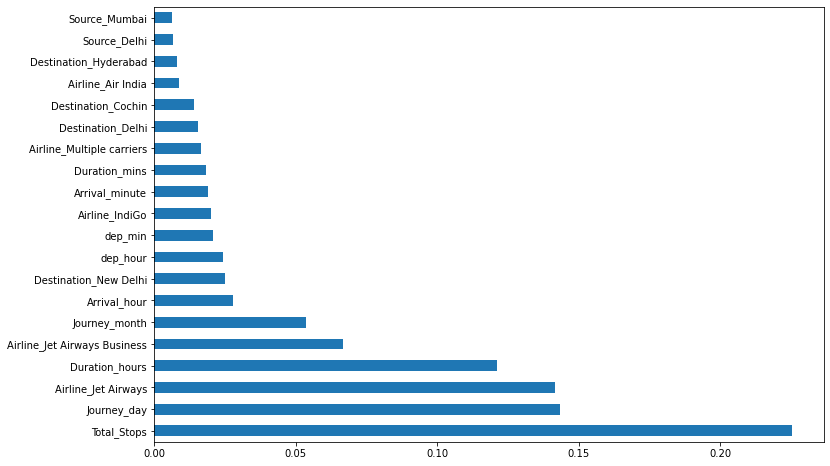

In [75]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Fitting model using Random Forest
Split dataset into train and test set in order to prediction w.r.t X_test
If needed do scaling of data
Scaling is not done in Random forest
Import model
Fit the data
Predict w.r.t X_test
In regression check RSME Score
Plot graph

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [79]:
y_pred = reg_rf.predict(X_test)

In [80]:
reg_rf.score(X_train, y_train)

0.953144800148548

In [81]:
reg_rf.score(X_test, y_test)

0.7958418714952837

C:\Users\SAMARTH\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


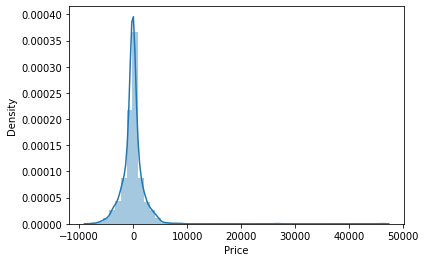

In [82]:
sns.distplot(y_test-y_pred)
plt.show()

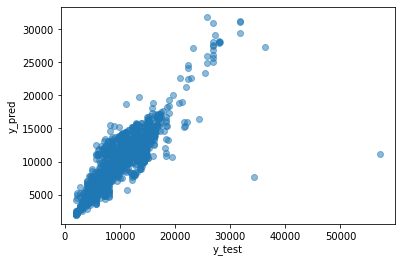

In [83]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [84]:
from sklearn import metrics

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1179.0963903940133
MSE: 4402069.065854151
RMSE: 2098.1108325953974


In [86]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [87]:
metrics.r2_score(y_test, y_pred)

0.7958418714952837

# Hyperparameter Tuning
Choose following method for hyperparameter tuning
RandomizedSearchCV --> Fast
GridSearchCV
Assign hyperparameters in form of dictionery
Fit the model
Check best paramters and best score


In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at  each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [90]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [93]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

C:\Users\SAMARTH\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


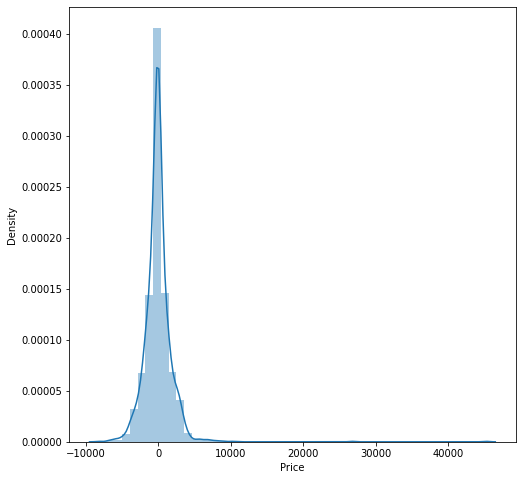

In [95]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()


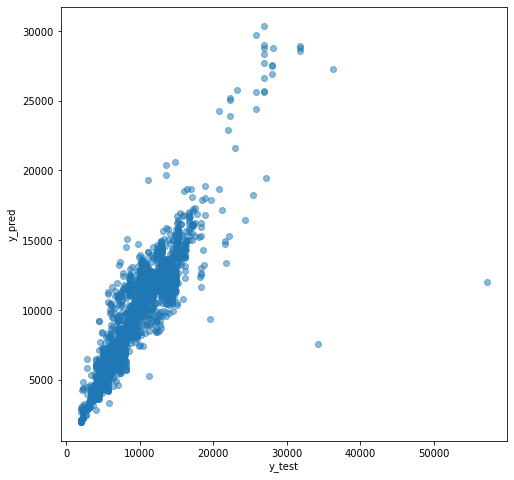

In [96]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [97]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1163.643891578361
MSE: 4047826.5150579293
RMSE: 2011.9211006045762


# Save the model to reuse it again

In [102]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [105]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [106]:
y_prediction = forest.predict(X_test)

In [108]:
metrics.r2_score(y_test, y_prediction)

0.7958418714952837

In [ ]:
-